# <center> Projet :
# <center> Trajectoire d'un bras de robot à 2 articulations
    

CHEN Christine et XIA Jieli (M1 IPS)

## OBJECTIFS :
• Mettre en équation la trajectoire de l’outil d’un bras articulé à 2 ddl  
• Résoudre un problème inverse  
• Utiliser _scipy.optimize_ pour résoudre un système d’équations non linéaires  
• Programmer et comparer différentes méthodes pour résoudre le système d’équations non linéaires par minimisation du résidu du système


# Travail à réaliser :

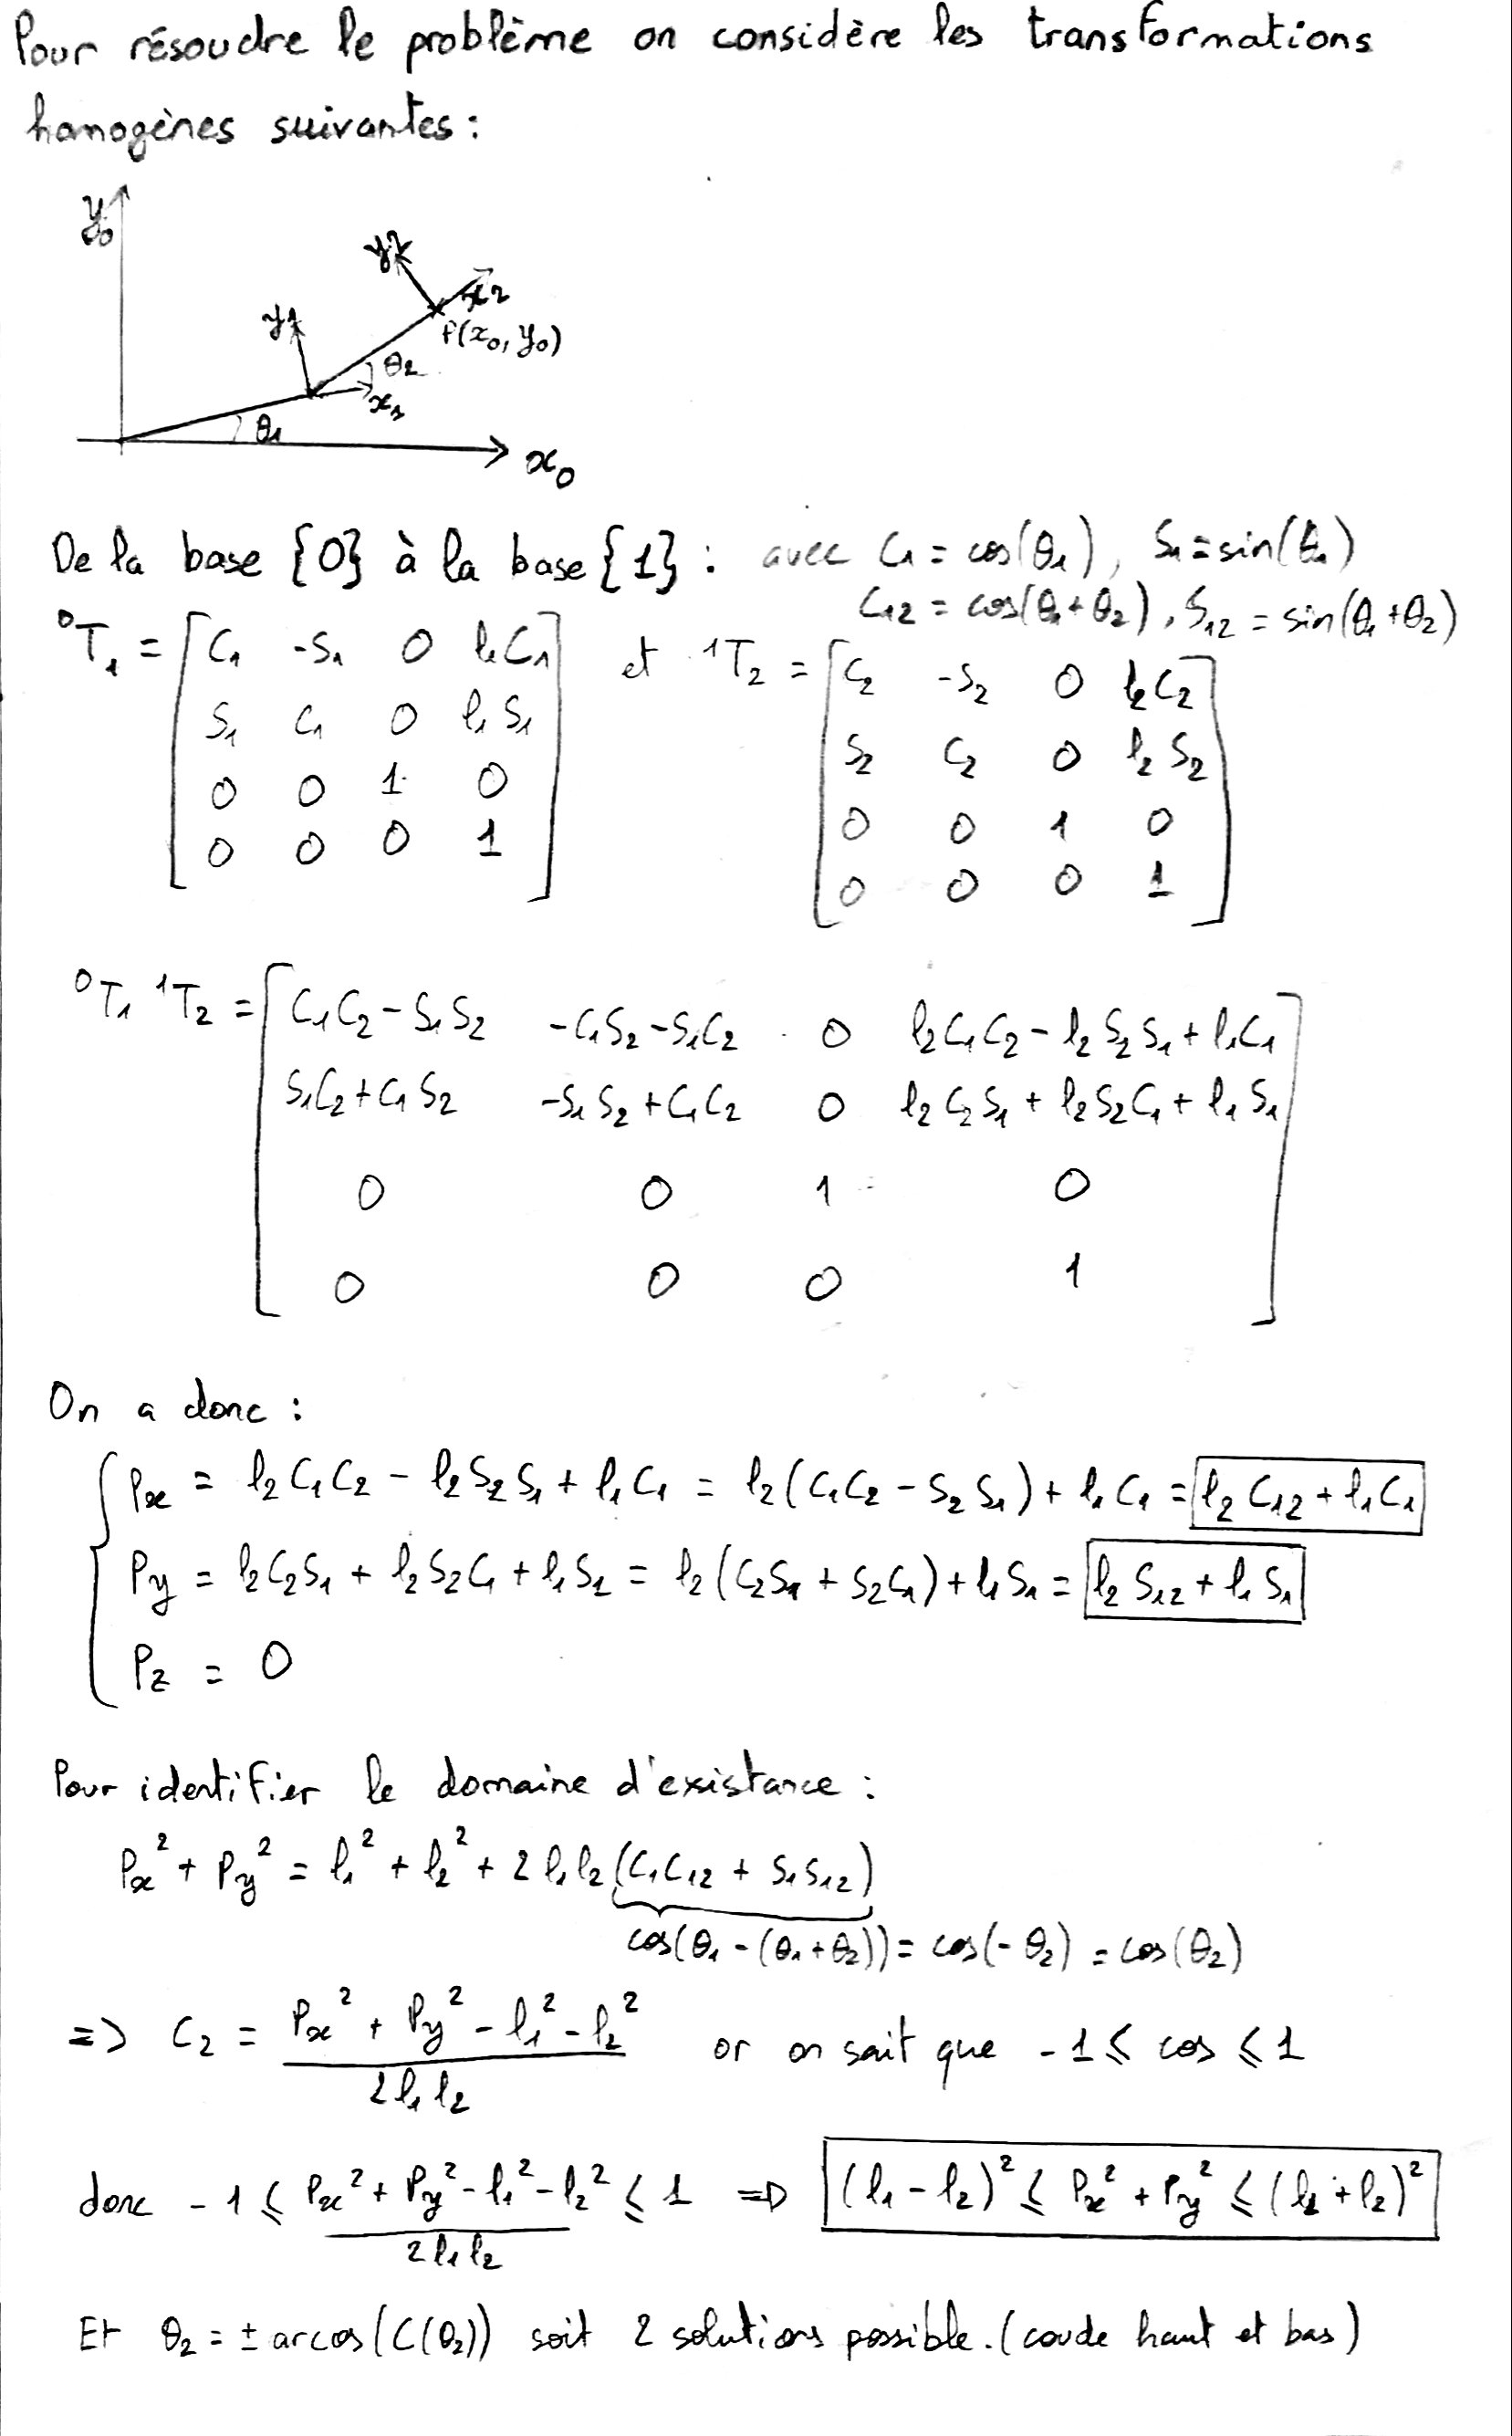

Il peut donc exister plusieurs solutions pour atteindre un point donné. Cependant, les solutions existent si et seulement si la norme au carré des coordonnées du point à atteindre est comprise entre $(l1-l2)^2$ et $(l1+l2)^2$.


# Le code :

In [3]:
#Import
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Pour qu'il y ait une cohérance avec nos valeurs trouvées, nous faisons nos tests et démonstrations avec **l1=2, l2=3, x=2** et **y=3**.

In [4]:
#Demande des longueurs du robot
l1 = float(input('Entrez une longueur l1: '))
l2 = float(input('Entrez une longueur l2: '))

Entrez une longueur l1:  2
Entrez une longueur l2:  3


In [5]:
#Demande de la position à atteindre
pos = [0,0]
pos[0] = float(input('Entrez une coordonnée x: '))
pos[1] = float(input('Entrez une coordonnée y: '))

#Vérifications de l'existence des solutions
if (l1-l2)**2 <= pos[0]**2 + pos[1]**2 <= (l1+l2)**2: #Domaine d'existence
    print('Les données entrent dans les conditions.')
else:
    while ( (l1-l2)**2 <= pos[0]**2 + pos[1]**2 <= (l1+l2)**2 ) == False: #Tant que les positions ne sont pas atteignables, redemander les positions
        print('Impossible la position est non atteignable, redonnez une autre.')
        pos[0] = float(input('Entrez une coordonnée x: '))
        pos[1] = float(input('Entrez une coordonnée y: '))
    print('Les données entrent dans les conditions.')
    

Entrez une coordonnée x:  2
Entrez une coordonnée y:  3


Les données entrent dans les conditions.


## <u>Première méthode</u> : utiliser la fonction « root » de la bibliothèque _scypy.optimize_ appliquées au résidu.

In [15]:
# Fonction Residu R(theta) = F(theta) - X avec F(theta)=[Px,Py] et X=[x,y]
def R(theta, pos):
    return [
        l1 * np.cos(theta[0]) + l2 * np.cos(theta[0]+theta[1]) - pos[0],
        l1 * np.sin(theta[0]) + l2 * np.sin(theta[0]+theta[1]) - pos[1]
        ]

# Differente valeur de depart de theta 1 et 2 pour trouver les 2 solutions
theta = [1,0] 
thetab = [0,1]
#Calcul des solutions
opt = optimize.root(R,theta,pos)
optb = optimize.root(R,thetab,pos)
print(f"(Solution 1, Les angles sont en degrees)\nL'angle theta1 vaut {math.degrees(opt.x[0])}.\nL'angle theta2 vaut {math.degrees(opt.x[1])}.")
print(f"(Solution 2, Les angles sont en degrees)\nL'angle theta1 vaut {math.degrees(optb.x[0])}.\nL'angle theta2 vaut {math.degrees(optb.x[1])}.")

(Solution 1, Les angles sont en degrees)
L'angle theta1 vaut 112.61986494807265.
L'angle theta2 vaut -90.00000000003222.
(Solution 2, Les angles sont en degrees)
L'angle theta1 vaut 7.831069173157288e-12.
L'angle theta2 vaut 89.99999999999086.


Cela vérifie bien l'existence de solutions non uniques qui dépendent des valeurs de départ de theta. Nous traçons les bras pour visualiser les solutions.

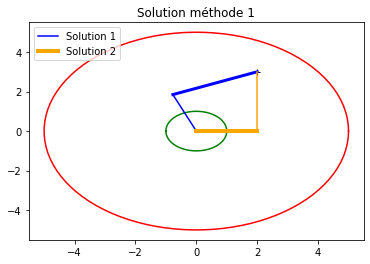

In [16]:
# Tracer un cercle
limite = np.linspace(0, 2*np.pi, 100)
lim1 = [(l1-l2) * np.cos(limite),(l1-l2) * np.sin(limite)] #definition du 1er cercle pour définir l'espace d'existence 
lim2 = [(l1+l2) * np.cos(limite),(l1+l2) * np.sin(limite)] #definition du 2e cercle 
plt.plot(pos[0],pos[1],'k+')
plt.title('Solution méthode 1')

# Tracer le domaine d'existence, soit que solution existe si lim1(cercle vert) <= solution <= lim2(cercle rouge)
plt.plot(lim1[0], lim1[1], color='green')
plt.plot(lim2[0], lim2[1], color='red')

# Tracer le robot pour solution 1
th1 = opt.x[0]
th2 = opt.x[1]
plt.plot([0,l1*np.cos(th1)],[0,l1*np.sin(th1)],color='b',label='Solution 1') #l1
plt.plot([l1*np.cos(th1), l2*np.cos(th1+th2)+l1*np.cos(th1)],[l1*np.sin(th1), l2*np.sin(th1+th2)+l1*np.sin(th1)],'b', linewidth=3) #l2

# Tracer le robot pour solution 2
thb1 = optb.x[0]
thb2 = optb.x[1]
plt.plot([0,l1*np.cos(thb1)],[0,l1*np.sin(thb1)],color='orange',label='Solution 2', linewidth=4) #l1
plt.plot([l1*np.cos(thb1), l2*np.cos(thb1+thb2)+l1*np.cos(thb1)],[l1*np.sin(thb1), l2*np.sin(thb1+thb2)+l1*np.sin(thb1)],'orange') #l2

plt.legend()

## <u>Deuxième méthode</u> : utiliser la fonction _minimize_ de la bibliothèque _scypy.optimize_ appliquées au carré de la norme du résidu. En effet, $||R(\theta)||^2 ≥ 0$ possède une borne inférieure et donc au moins un minimum. S’il existe une racine $\theta_0$ telle que $R(\theta_0) = 0$, alors $‖R(\theta_0)‖^2 = 0$ et $\theta_0$ est un minimum de $‖R_\theta‖^2$. Petite question de réflexion : comment faut-il interpréter un minimum qui ne serait pas nul ?

In [17]:
# On choisi 2 différent theta initial comme point de départ pour avoir les 2 solutions (les mêmes que la 1er méthode)
theta_init0=np.array(theta) 
theta_init1=np.array(thetab) 

# Fonction de la norme du résidu au carré
def J(theta, pos):
    R1 = R(theta, pos)
    return np.array( R1[0]**2 + R1[1]**2 )

# Solution 1
opt_mini = optimize.minimize(J, theta_init0, pos)
# Solution 2
optb_mini = optimize.minimize(J, theta_init1, pos)

print("La première solution vaut ",opt_mini.x, "(en radian)")
print("La deuxième solution vaut ",optb_mini.x, "(en radian)")


La première solution vaut  [ 1.96558742 -1.57079631] (en radian)
La deuxième solution vaut  [-9.89669499e-08  1.57079658e+00] (en radian)


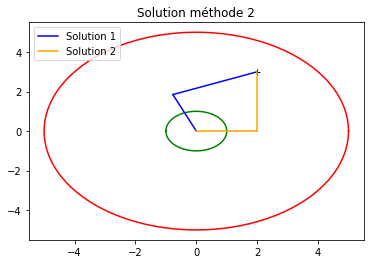

In [18]:
# Tracer le domaine d'existence
plt.title('Solution méthode 2')
plt.plot(lim1[0], lim1[1], color='green')
plt.plot(lim2[0], lim2[1], color='red')
plt.plot(pos[0],pos[1],'k+')

# Tracer le robot pour solution 1
th1 = opt_mini.x[0]
th2 = opt_mini.x[1]
plt.plot([0,l1*np.cos(th1)],[0,l1*np.sin(th1)],color='b',label='Solution 1') #l1
plt.plot([l1*np.cos(th1), l2*np.cos(th1+th2)+l1*np.cos(th1)],[l1*np.sin(th1), l2*np.sin(th1+th2)+l1*np.sin(th1)],'b') #l2
plt.legend('')

# Tracer le robot pour solution 2
thb1 = optb_mini.x[0]
thb2 = optb_mini.x[1]
plt.plot([0,l1*np.cos(thb1)],[0,l1*np.sin(thb1)],color='orange',label='Solution 2') #l1
plt.plot([l1*np.cos(thb1), l2*np.cos(thb1+thb2)+l1*np.cos(thb1)],[l1*np.sin(thb1), l2*np.sin(thb1+thb2)+l1*np.sin(thb1)],'orange') #l2

plt.legend()

Un minimum qui ne serait pas nul, soit que $𝜃_0$ ne soit pas nul veut dire que le point à atteindre ne se situe pas sur la limite du domaine atteignable (le cercle rouge).
Si 𝜃0 est nul, la solution est unique. Sinon les solutions ne sont pas uniques comme le montre l'exemple ci-dessus.


Prenons un exemple pour montrer que pour un point à atteindre sur le cercle, seul une solution existe. On prends x=0 et y=5 :

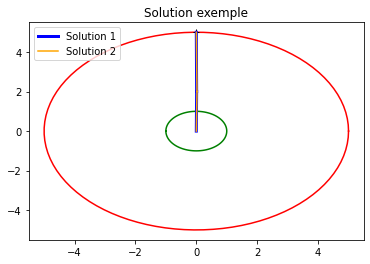

In [19]:
posex=[0,5]
# Solution 1
opt_mini = optimize.minimize(J, theta_init0, posex)
# Solution 2
optb_mini = optimize.minimize(J, theta_init1, posex)
# Tracer le domaine d'existence
plt.title('Solution exemple')
plt.plot(lim1[0], lim1[1], color='green')
plt.plot(lim2[0], lim2[1], color='red')
plt.plot(posex[0],posex[1],'k+')

# Tracer le robot pour solution 1
th1 = opt_mini.x[0]
th2 = opt_mini.x[1]
plt.plot([0,l1*np.cos(th1)],[0,l1*np.sin(th1)],color='b',label='Solution 1', linewidth=3) #l1
plt.plot([l1*np.cos(th1), l2*np.cos(th1+th2)+l1*np.cos(th1)],[l1*np.sin(th1), l2*np.sin(th1+th2)+l1*np.sin(th1)],'b', linewidth=3) #l2
plt.legend('')

# Tracer le robot pour solution 2
thb1 = optb_mini.x[0]
thb2 = optb_mini.x[1]
plt.plot([0,l1*np.cos(thb1)],[0,l1*np.sin(thb1)],color='orange',label='Solution 2') #l1
plt.plot([l1*np.cos(thb1), l2*np.cos(thb1+thb2)+l1*np.cos(thb1)],[l1*np.sin(thb1), l2*np.sin(thb1+thb2)+l1*np.sin(thb1)],'orange') #l2

plt.legend()

Qu'importe le $\theta$ de départ la solution est unique. 

## <u>Troisième méthode</u> : écrire votre propre programme pour minimiser le carré de la norme du résidu en appliquant la méthode du gradient à pas fixe, avec un mécanisme qui garantit que la norme du résidu diminue à chaque itération (pas « adaptatif », voir explications en annexe).

In [20]:
# Defintion de la fonction de gradient
def d_J(theta,pos):
    C1, C12 = np.cos(theta[0]), np.cos(theta[0]+theta[1])
    S1, S12 = np.sin(theta[0]), np.sin(theta[0]+theta[1])
    
    d_J1 = 2*(l1*C1+l2*C12-pos[0])*(-l1*S1-l2*S12) + 2*(l1*C1+l2*C12)*(l1*S1+l2*S12-pos[1]) #on derive la norme du résidu au carré selon theta1
    d_J2 = 2*(l1*C1+l2*C12-pos[0])*(-l2*S12) + 2*(l1*S1+l2*S12-pos[1])*(l2*C12)#on derive la norme du résidu au carré selon theta2
    
    return np.array([d_J1, d_J2])


# Méthode du gradiant avec $\alpha$ fixe

In [21]:
# Fonction pour la résolution avec la méthode du gradient
def grad(x0,alpha,eps,n_max,pos):
    converge = False # Pour vérifier si des solutions ont été trouver
    x_n = x0 #Theta
    dX, dXn = 1,0
    n = 0
    liste_x = [x_n[0]] # Pour tracer les différentes solutions de theta1
    liste_y = [x_n[1]] # Pour tracer les différentes solutions de theta2
    
    while np.abs(dX-dXn)>eps and n<n_max:
        dXn = dX
        dJ1,dJ2 = d_J(x_n,pos)
        x_n1a = x_n[0] - alpha * dJ1
        x_n1b = x_n[1] - alpha * dJ2
        dX = np.sqrt(x_n1a**2 + x_n1b**2)
        x_n = [x_n1a,x_n1b]
        liste_x.append(x_n[0]) #Ajout des valeurs
        liste_y.append(x_n[1]) #theta1 et theta2 pour pouvoir les tracer
        n+=1
    converge = (np.abs(dX-dXn)<=eps)
    print("Solution existante:", converge)
    return x_n,liste_x,liste_y #return une liste de coordonnée pour les différents étapes de recherche de solutions
                                #ainsi que la dernière solution


Solution existante: True
Solution existante: True
Solution existante: True
Solution existante: True


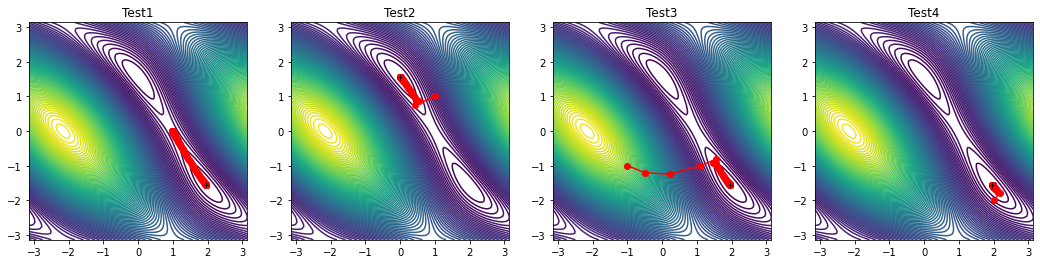

In [22]:
# Tests avec différentes valeurs de départ :
test1 = [1,0]
test2 = [1,1]
test3 = [-1,-1]
test4 = [2,-2]
test5 = [-2,2]
# On choisit des données avec alpha assez petit pour avoir des solutions (alpha=0.02)
alphatest = .03
precisiontest = 10**(-5)

test = grad(test1,alphatest,precisiontest,1000,pos)
testa = grad(test2,alphatest,precisiontest,1000,pos)
testb = grad(test3,alphatest,precisiontest,1000,pos)
testc = grad(test4,alphatest,precisiontest,1000,pos)

xmin, xmax=-np.pi,np.pi
ymin, ymax=-np.pi,np.pi

x = np.linspace(-np.pi, np.pi, 101)
y = np.linspace(-np.pi, np.pi, 101)

def affiche(test):
    title_list = ['Test1','Test2','Test3', 'Test4'] 
    tabx, taby = np.meshgrid(x, y)
    tabJ = J([tabx, taby], pos)
    fig, ax = plt.subplots(1, 4, figsize=(18,4))
    for i in range(4):
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        ax[i].set_title(title_list[i])
        ax[i].contour(tabx, taby, tabJ, 101)
        ax[i].plot(test[i][1],test[i][2],'-or')
        ax[i].plot(test[i][0][0],test[i][0][1],'+k')
        
affiche([test, testa, testb, testc])


Pour différentes valeurs de $x_0$, on a soit la solution au point critique 0 et 1.57 ou 1.96 et -1.57.

Plus alpha est petit, plus les pas seront petits. Cependant, si le alpha est trop petit, alors les points critiques ne seront pas atteints.  
Si alpha est trop grand, alors les pas seront trop grands et non exploitables, on n'atteindra jamais les points critiques.

Voici un exemple pour le montrer :

Solution existante: True
Solution existante: False
Solution existante: True
Solution existante: True
Les solutions pour x0 = [2,0] sont : 1.306 et -0.496
Les solutions pour x0 = [0,1] sont : 2.929 et 5.211


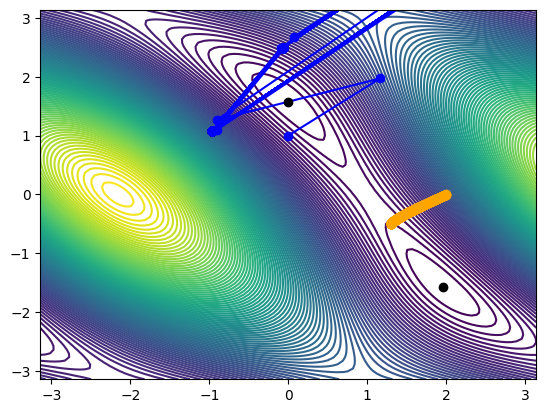

In [12]:
# Mise en oeuvre
alphaPetit = .0001
alphaGrand = .1
solGfixe = grad([2,0],alphaPetit,10**(-5),1000,pos)    # theta = [2,0]
solGfixe2 = grad(thetab,alphaGrand,10**(-5),1000,pos)  # thetab = [0,1]

# Avec un bon alpha (0.03)
solG = grad([2,0],alphatest,10**(-5),1000,pos) 
solG2 = grad(thetab,alphatest,10**(-5),1000,pos)

# Trace la figure
plt.figure()
tabx, taby = np.meshgrid(x, y)
tabJ = J([tabx, taby], pos)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.contour(tabx, taby, tabJ, 101)

plt.plot(solGfixe[1],solGfixe[2],'-o',color='orange')
plt.plot(solG[0][0],solG[0][1],'ok')

plt.plot(solGfixe2[1],solGfixe2[2],'-ob')
plt.plot(solG2[0][0],solG2[0][1],'ok')

print(f"Les solutions pour x0 = [2,0] sont : {round(solGfixe[0][0],3)} et {round(solGfixe[0][1],3)}")
print(f"Les solutions pour x0 = [0,1] sont : {round(solGfixe2[0][0],3)} et {round(solGfixe2[0][1],3)}")

Cela montre bien que si alpha est trop grand (trait bleu), la solution (en point noir) n'est jamais atteinte.
Et si alpha est trop petit (trait orange), il va trouver une valeur inférieure à son point de départ mais qui ne correspond pas au vrai minimum car la prochaine isovaleur est trop loin comparée au pas.

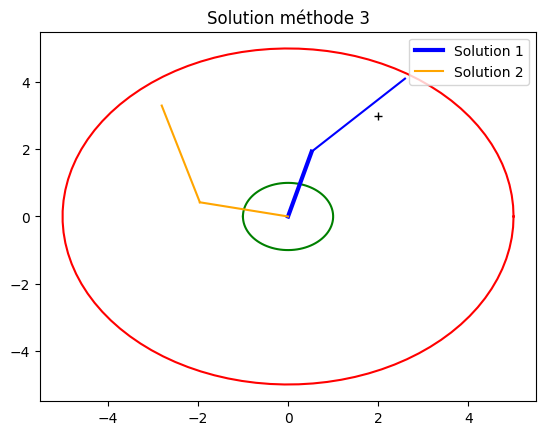

In [13]:
# Tracer le domaine d'existance
plt.title('Solution méthode 3')
plt.plot(lim1[0], lim1[1], color='green')
plt.plot(lim2[0], lim2[1], color='red')
plt.plot(pos[0],pos[1],'k+')

# Tracer le robot pour solution 1
thGfixe1, thGfixe2 = solGfixe[0]
plt.plot([0,l1*np.cos(thGfixe1)],[0,l1*np.sin(thGfixe1)],color='b',label='Solution 1', linewidth=3)
plt.plot([l1*np.cos(thGfixe1), l2*np.cos(thGfixe1+thGfixe2)+l1*np.cos(thGfixe1)],[l1*np.sin(thGfixe1), l2*np.sin(thGfixe1+thGfixe2)+l1*np.sin(thGfixe1)],color='b')

# Tracer le robot pour solution 2
thGfixeb1, thGfixeb2 = solGfixe2[0]
plt.plot([0,l1*np.cos(thGfixeb1)],[0,l1*np.sin(thGfixeb1)],color='orange',label='Solution 2')
plt.plot([l1*np.cos(thGfixeb1), l2*np.cos(thGfixeb1+thGfixeb2)+l1*np.cos(thGfixeb1)],[l1*np.sin(thGfixeb1), l2*np.sin(thGfixeb1+thGfixeb2)+l1*np.sin(thGfixeb1)],'orange')

plt.legend()

La solution (croix noir) n'est jamais atteinte

# Méthode du gradiant avec $\alpha$ optimal

In [82]:
def grad2(x0,alpha,eps,n_max,pos):
    converge = False
    x_n = x0 # Theta
    alp = alpha
    print(f"Alpha vaut {alp} au début du programme.")
    dX, dXn = 1,0
    n = 0
    liste_x = [x_n[0]]
    liste_y = [x_n[1]]
    
    while np.abs(dX-dXn)>eps and n<n_max:
        
        dJ1,dJ2 = d_J(x_n,pos)
        x_n1a = x_n[0] - alp * dJ1
        x_n1b = x_n[1] - alp * dJ2
        
        # Si la différence entre les solutions de theta actuelles et les solutions de theta futur sont trop différents (>0.5)
        # Alors on diminuera l'alpha
        if abs(x_n1a-x_n[0])>0.5 and abs(x_n1b-x_n[1])>0.5:
            alp =abs(alp- 0.01)
        
        # Sinon on applique la méthode
        else:
            dXn = dX
            dX = np.sqrt(x_n1a**2 + x_n1b**2)
            x_n = [x_n1a,x_n1b]
            liste_x.append(x_n[0])
            liste_y.append(x_n[1])
            n += 1
            
    print(f"Alpha vaut {round(alp,4)} a la fin du programme.")
    converge = (np.abs(dX-dXn)<=eps)
    print("Solution existante:",converge)
    return x_n,liste_x,liste_y

In [158]:
# Tests avec différentes valeurs de départ :
test1 = [1,0]
test2 = [-2,1]
test3 = [0,-2]
test4 = [2,2]
test5 = [-3,0]
# On choisit des alpha de départ
alpha1 = 0.01
alpha2 = 1
alpha3 = 100
precision = 10**(-5)

xmin, xmax=-np.pi,np.pi
ymin, ymax=-np.pi,np.pi

x = np.linspace(-np.pi, np.pi, 101)
y = np.linspace(-np.pi, np.pi, 101)

tabx, taby = np.meshgrid(x, y)
tabJ = J([tabx, taby], pos)

def affiche2(test):
    title = 'Test' 
    tabx, taby = np.meshgrid(x, y)
    tabJ = J([tabx, taby], pos)
    fig, ax = plt.subplots(1, len(test), figsize=(18,4))
    
    for i in range(len(test)):
        t = title + str(i+1) 
        ax[i].set_title(t)
        ax[i].contour(tabx, taby, tabJ, 101)
        ax[i].plot(test[i][1],test[i][2],'-or')
        ax[i].plot(test[i][0][0],test[i][0][1],'+k')


Alpha vaut 0.01 au début du programme.
Alpha vaut 0.01 a la fin du programme.
Solution existante: True
Alpha vaut 1 au début du programme.
Alpha vaut 0.03 a la fin du programme.
Solution existante: True
Alpha vaut 100 au début du programme.
Alpha vaut 0.03 a la fin du programme.
Solution existante: True


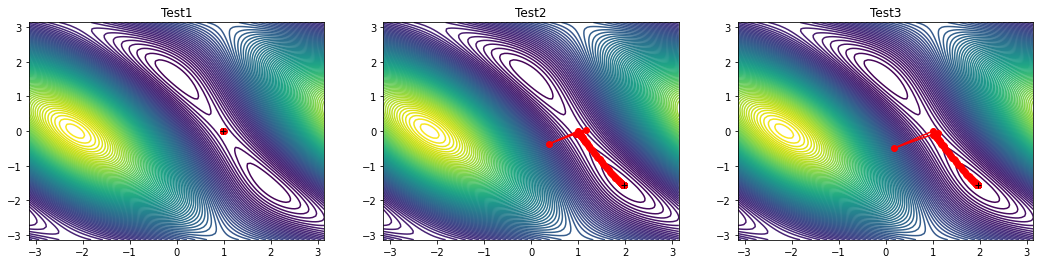

In [161]:
# Test avec différents alpha pour theta fixe ([1,0])
test_1 = grad2(test1,alpha1,precision,1000,pos)
test_2 = grad2(test1,alpha2,precision,1000,pos)
test_3 = grad2(test1,alpha3,precision,1000,pos)

affiche2([test_1,test_2,test_3])

On peut voir que peu importe la valeur du $\alpha$, à condition qu'il soit plus grand que le $\alpha$ optimal (ici 0.01), le point critique est toujours atteint.  
Si alpha est plus petit que le $\alpha$ optimal alors il ne convergera pas vers la bonne solution.

Alpha vaut 100 au début du programme.
Alpha vaut 0.01 a la fin du programme.
Solution existante: True
Alpha vaut 100 au début du programme.
Alpha vaut 0.04 a la fin du programme.
Solution existante: True
Alpha vaut 100 au début du programme.
Alpha vaut 0.04 a la fin du programme.
Solution existante: True
Alpha vaut 100 au début du programme.
Alpha vaut 0.02 a la fin du programme.
Solution existante: True


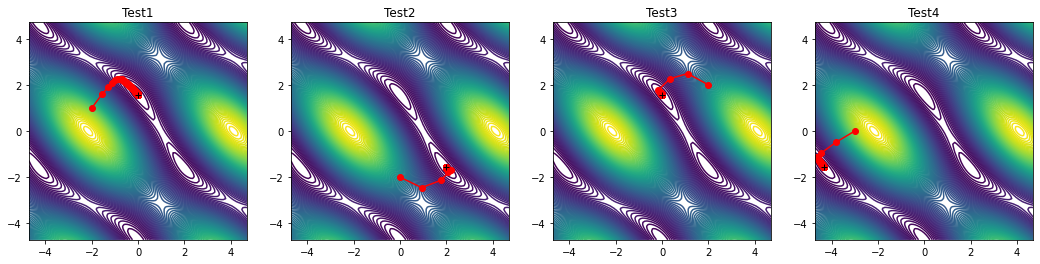

In [146]:
# Test avec différents theta pour alpha fixe (10)
test_a = grad2(test2,alpha3,precision,1000,pos)
test_b = grad2(test3,alpha3,precision,1000,pos)
test_c = grad2(test4,alpha3,precision,1000,pos)
test_d = grad2(test5,alpha3,precision,1000,pos)

x = np.linspace(-1.5*np.pi, 1.5*np.pi, 101)
y = np.linspace(-1.5*np.pi, 1.5*np.pi, 101)
tabx, taby = np.meshgrid(x, y)
tabJ = J([tabx, taby], pos)

affiche2([test_a, test_b, test_c,test_d])

Ici, peu importe le point, $\alpha$ diminue et atteint le minimum à plus ou moins 2$\pi$ avec un $\alpha$ optimal.
  
On en conclut qu'après avoir fait une méthode de gradiant avec un $\alpha$ à pas optimal, la seule condition qu'il y a est que le $\alpha$ ne soit pas trop petit. Par précaution on peut choisir $\alpha = 10$.

## <u>Quatrième méthode</u> : écrire votre propre programme pour minimiser le carré de la norme du résidu en appliquant la méthode de Newton.

In [18]:
# Defintion de la fonction de gradient
def d_J(theta,pos):
    C1, C12 = np.cos(theta[0]), np.cos(theta[0]+theta[1])
    S1, S12 = np.sin(theta[0]), np.sin(theta[0]+theta[1])
    
    d_J1 = 2*(l1*C1+l2*C12-pos[0])*(-l1*S1-l2*S12) + 2*(l1*C1+l2*C12)*(l1*S1+l2*S12-pos[1]) #on derive la norme du résidu au carré selon theta1
    d_J2 = 2*(l1*C1+l2*C12-pos[0])*(-l2*S12) + 2*(l1*S1+l2*S12-pos[1])*(l2*C12)#on derive la norme du résidu au carré selon theta2
    
    return np.array([d_J1, d_J2])


In [19]:
# Matrice hessienne
def mat_H(theta, pos):
    C1, C12 = np.cos(theta[0]), np.cos(theta[0]+theta[1])
    S1, S12 = np.sin(theta[0]), np.sin(theta[0]+theta[1])
    
    d_H11 = 2*((l1*C1+l2*C12-pos[0])*(-l1*C1-l2*C12) + (-l1*S1-l2*S12)*(-l1*S1-l2*S12)) + 2*((l1*C1+l2*C12)**2+(l1*S1+l2*S12-pos[1])*(-l1*S1-l2*S12))
    d_H12 = 2*((l1*C1+l2*C12-pos[0])*(-l2*C12) + (l2*S12)*(-l1*S1-l2*S12)) + 2*((l1*C1+l2*C12)*(l2*C12) + (-l2*S12)*(l1*S1+l2*S12-pos[1]))
    d_H21 = 2*((l1*C1+l2*C12-pos[0])*(-l2*C12) + (-l2*S12)*(-l1*S1-l2*S12)) + 2*((l1*S1+l2*S12-pos[1])*(-l2*S12) + (l2*C12)*(l1*C1+l2*C12))
    d_H22 = 2*((l1*C1+l2*C12-pos[0])*(-l2*C12) + (-l2*S12)**2) + 2*((l1*S1+l2*S12-pos[1])*(-l2*S12)+(l2*C12)**2)
    
    return np.array([[d_H11, d_H12],[d_H21,d_H22]])

In [20]:
# Fonction de la méthode de résolution de Newton
def Newton ( theta, precision, nmax, pos) :
    converge = False
    th1, th2 = theta[0], theta[1]
    liste_x = [th1]
    liste_y = [th2]
    dX, n = 1, 0
    while dX > precision and n < nmax : # Résolution jusqu'a convergence ou si nmax est atteint soit que la solution n'a pas été trouver
        dev_J = d_J([th1, th2], pos)
        H = mat_H([th1, th2], pos)
        delt_X = np.matmul((-dev_J.transpose()),np.linalg.inv(H)) # delt_X = -dev_J . H**-1 (ici on fait la transposée le dev_J pour avoir un vecteur colonne)
        th1 = th1 + delt_X[0]
        th2 = th2 + delt_X[1]
        dX = math.sqrt(delt_X[0]**2 + delt_X[1]**2)
        liste_x.append(th1)
        liste_y.append(th2)
        n += 1
    converge = (dX<=precision)
    print("Solution existante:",converge)
    return np.array([th1, th2]), liste_x, liste_y

In [21]:
precision = 10**(-5)
nmax = 1000

sol_Newton1 = Newton(theta,precision,nmax,pos)
sol_Newton2 = Newton(thetab,precision,nmax,pos)

Solution existante: True
Solution existante: True


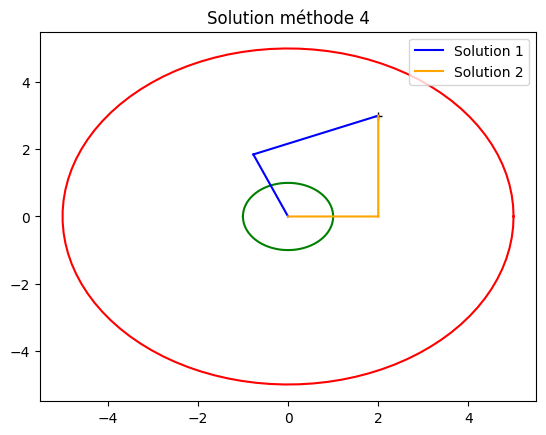

In [22]:
# Tracer le domaine d'existence
plt.title('Solution méthode 4')
plt.plot(lim1[0], lim1[1], color='green')
plt.plot(lim2[0], lim2[1], color='red')
plt.plot(pos[0],pos[1],'k+')

# Tracer le robot solution 1
thN1,thN2 = sol_Newton1[0]
plt.plot([0,l1*np.cos(thN1)],[0,l1*np.sin(thN1)],color='b',label='Solution 1') #l1
plt.plot([l1*np.cos(thN1), l2*np.cos(thN1+thN2)+l1*np.cos(thN1)],[l1*np.sin(thN1), l2*np.sin(thN1+thN2)+l1*np.sin(thN1)],'b') #l2
plt.legend()

# Tracer le robot solution 2
thbN1, thbN2 = sol_Newton2[0]
plt.plot([0,l1*np.cos(thbN1)],[0,l1*np.sin(thbN1)],color='orange',label='Solution 2') #l1
plt.plot([l1*np.cos(thbN1), l2*np.cos(thbN1+thbN2)+l1*np.cos(thbN1)],[l1*np.sin(thbN1), l2*np.sin(thbN1+thbN2)+l1*np.sin(thbN1)],'orange') #l2

plt.legend()

On trouve bien une soluion, la méthode marche. Il faut faire attention d'avoir une précision faible pour que cela fonctionne correctement.

Pour la méthode de Newton, le point de départ est important. S'il n'est pas assez proche de la solution, elle ne sera pas trouvée car il faut que la fonction soit convexe. Sinon la méthode de Newton va trouver un minimum locale et non globale.

Nous le montrons avec un theta de départ à [-2,2].

Solution existante: True


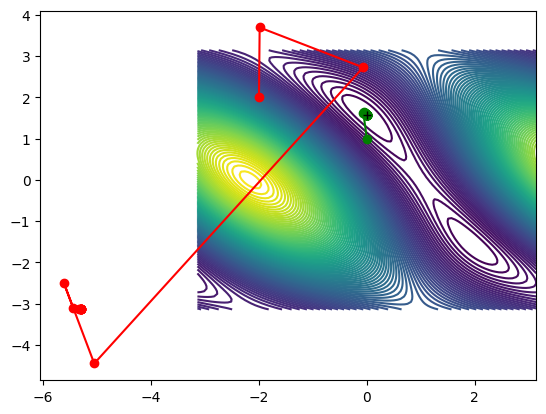

In [32]:
sol_NewtonB = Newton([-2,2],precision,nmax,pos)

plt.figure()
plt.contour(tabx, taby, tabJ, 101)
plt.plot(sol_NewtonB[1],sol_NewtonB[2],'-or') # Solution fausse
plt.plot(sol_Newton2[1],sol_Newton2[2],'-og') # Solution de l'exemple précedent
plt.plot(sol_Newton2[1][-1],sol_Newton2[2][-1],'+k')

Une solution est bien trouvée (traits rouges) car la fonction nous renvoie True. Cependant, elle ne correspond pas à la solution que l'on veut.
Elle converge, mais vers un point qui n'est pas une vraie solution.

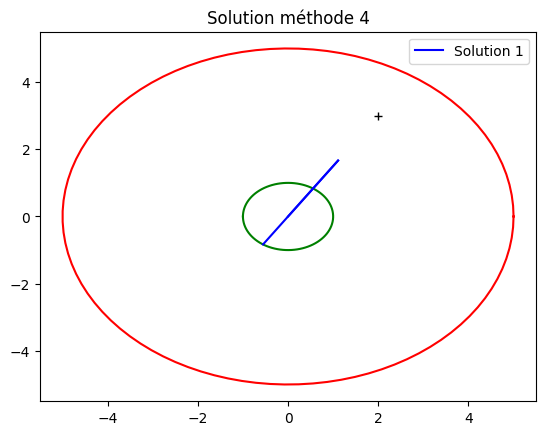

In [33]:
# Tracer le domaine d'existence
plt.title('Solution méthode 4')
plt.plot(lim1[0], lim1[1], color='green')
plt.plot(lim2[0], lim2[1], color='red')
plt.plot(pos[0],pos[1],'k+')

# Tracer le robot solution 1
thN1,thN2 = sol_NewtonB[0]
plt.plot([0,l1*np.cos(thN1)],[0,l1*np.sin(thN1)],color='b',label='Solution 1') #l1
plt.plot([l1*np.cos(thN1), l2*np.cos(thN1+thN2)+l1*np.cos(thN1)],[l1*np.sin(thN1), l2*np.sin(thN1+thN2)+l1*np.sin(thN1)],'b') #l2
plt.legend()


On voit bien avec ce dessin que la solution ne correspond pas.